In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [131]:
raw_data = requests.get('https://openprescribing.net/api/1.0/spending_by_practice/?code=5.1&org=14L&format=json')
if raw_data.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))

In [132]:
raw_data1 = raw_data.json()

In [4]:
raw_data1

[{'setting': 4,
  'actual_cost': 2856.64,
  'items': 417,
  'row_id': 'P84004',
  'ccg': '14L',
  'quantity': 18650,
  'row_name': 'FIVE OAKS FAMILIY PRACTICE',
  'date': '2014-10-01'},
 {'setting': 4,
  'actual_cost': 919.79,
  'items': 203,
  'row_id': 'P84005',
  'ccg': '14L',
  'quantity': 8165,
  'row_name': 'THE VALLANCE CENTRE',
  'date': '2014-10-01'},
 {'setting': 4,
  'actual_cost': 2063.74,
  'items': 357,
  'row_id': 'P84009',
  'ccg': '14L',
  'quantity': 17084,
  'row_name': 'AILSA CRAIG MEDICAL CENTRE',
  'date': '2014-10-01'},
 {'setting': 4,
  'actual_cost': 1873.21,
  'items': 423,
  'row_id': 'P84010',
  'ccg': '14L',
  'quantity': 17154,
  'row_name': 'THE BORCHARDT MEDICAL CENTRE',
  'date': '2014-10-01'},
 {'setting': 4,
  'actual_cost': 2992.22,
  'items': 644,
  'row_id': 'P84012',
  'ccg': '14L',
  'quantity': 28069,
  'row_name': 'NORTHENDEN GROUP PRACTICE',
  'date': '2014-10-01'},
 {'setting': 4,
  'actual_cost': 1423.76,
  'items': 397,
  'row_id': 'P84014'

In [5]:
data = pd.DataFrame(raw_data1)

In [6]:
columns = data.columns

In [7]:
columns

Index(['actual_cost', 'ccg', 'date', 'items', 'quantity', 'row_id', 'row_name',
       'setting'],
      dtype='object')

In [8]:
columns[6],columns[2]

('row_name', 'date')

In [9]:
data = data.sort_values([columns[2],columns[6]])

In [10]:
data.iloc[1:10]

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting
75,388.59,14L,2014-10-01,116,4482,P84665,AL-SHIFA MEDICAL CENTRE,4
59,46.11,14L,2014-10-01,25,945,P84623,ALEESHAN MEDICAL CENTRE,4
78,1815.39,14L,2014-10-01,463,15731,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,4
63,672.74,14L,2014-10-01,145,5508,P84631,ARTANE MEDICAL CENTRE,4
40,1732.05,14L,2014-10-01,357,16139,P84053,ASHCROFT SURGERY,4
26,1856.54,14L,2014-10-01,306,18261,P84038,ASHVILLE SURGERY,4
23,2493.03,14L,2014-10-01,500,24469,P84034,BARLOW MEDICAL CENTRE,4
22,2158.16,14L,2014-10-01,413,21953,P84033,BEACON MEDICAL CENTRE,4
19,3777.36,14L,2014-10-01,803,33807,P84029,BENCHILL MEDICAL PRACTICE,4


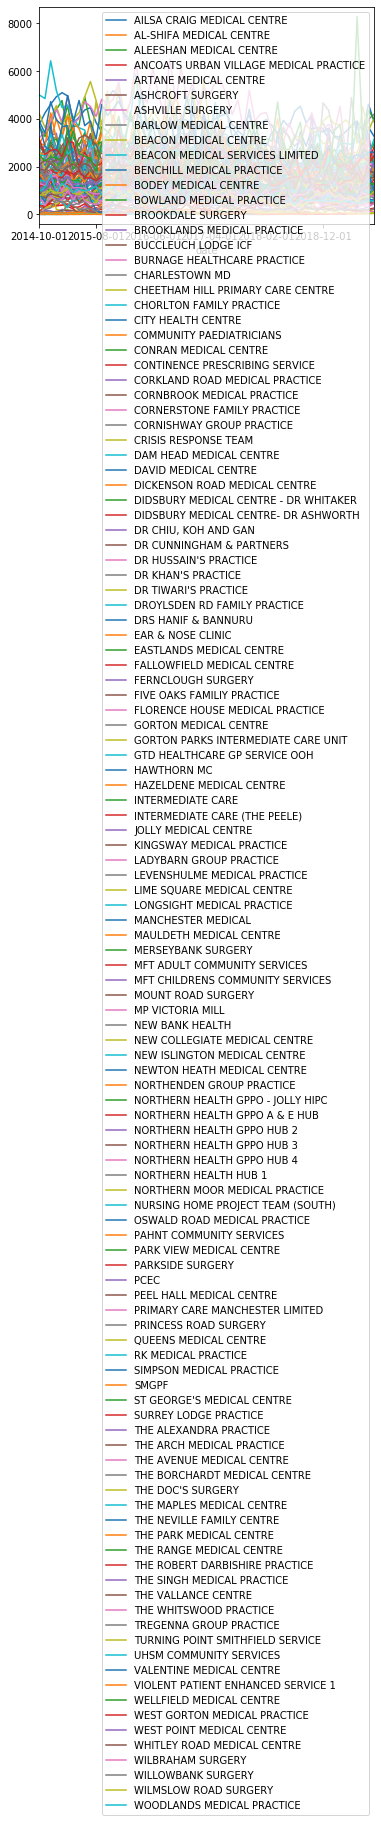

In [11]:
grouped = data.groupby('row_name')
fig, ax = plt.subplots()
for key, group in grouped:
    group.plot('date', 'actual_cost', label=key, ax=ax)

In [12]:
listsize_data = requests.get('https://openprescribing.net/api/1.0/org_details/?org_type=practice&org=14L&keys=total_list_size&format=json')
if raw_data.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))
    
listsize_data = listsize_data.json()
listsize_data = pd.DataFrame(listsize_data)
listsize_data = listsize_data.sort_values([columns[2],columns[6]])

In [13]:
listsize_data.iloc[1:10]

,date,row_id,row_name,total_list_size
74,2014-10-01,P84665,AL-SHIFA MEDICAL CENTRE,2749
59,2014-10-01,P84623,ALEESHAN MEDICAL CENTRE,1297
77,2014-10-01,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,9102
63,2014-10-01,P84631,ARTANE MEDICAL CENTRE,2005
40,2014-10-01,P84053,ASHCROFT SURGERY,8036
26,2014-10-01,P84038,ASHVILLE SURGERY,7899
23,2014-10-01,P84034,BARLOW MEDICAL CENTRE,13424
22,2014-10-01,P84033,BEACON MEDICAL CENTRE,3839
19,2014-10-01,P84029,BENCHILL MEDICAL PRACTICE,9334


In [14]:
merged_data = pd.merge(data, listsize_data, on=['row_name','date','row_id'])

In [15]:
merged_data

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting,total_list_size
0,2063.74,14L,2014-10-01,357,17084,P84009,AILSA CRAIG MEDICAL CENTRE,4,9342
1,388.59,14L,2014-10-01,116,4482,P84665,AL-SHIFA MEDICAL CENTRE,4,2749
2,46.11,14L,2014-10-01,25,945,P84623,ALEESHAN MEDICAL CENTRE,4,1297
3,1815.39,14L,2014-10-01,463,15731,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,4,9102
4,672.74,14L,2014-10-01,145,5508,P84631,ARTANE MEDICAL CENTRE,4,2005
5,1732.05,14L,2014-10-01,357,16139,P84053,ASHCROFT SURGERY,4,8036
6,1856.54,14L,2014-10-01,306,18261,P84038,ASHVILLE SURGERY,4,7899
7,2493.03,14L,2014-10-01,500,24469,P84034,BARLOW MEDICAL CENTRE,4,13424
8,2158.16,14L,2014-10-01,413,21953,P84033,BEACON MEDICAL CENTRE,4,3839
9,3777.36,14L,2014-10-01,803,33807,P84029,BENCHILL MEDICAL PRACTICE,4,9334


In [16]:
def getcombined(CCG, BNF):
    
    linkapi_1 = 'https://openprescribing.net/api/1.0/spending_by_practice/?'
    linkapi_2 = 'https://openprescribing.net/api/1.0/org_details/?org_type=practice'
    code = 'code='
    org = '&org='
    ex = '&keys=total_list_size'
    form = '&format=json'
    
    firstcall = linkapi_1 + code + str(BNF) + org + CCG + form
    raw_data = requests.get(firstcall)
    
    if raw_data.status_code != 200:
        # This means something went wrong.
        raise ApiError('GET /tasks/ {}'.format(resp.status_code))
    
    secondcall = linkapi_2 + org + CCG + ex + form
    listsize_data = requests.get(secondcall)
    if raw_data.status_code != 200:
        # This means something went wrong.
        raise ApiError('GET /tasks/ {}'.format(resp.status_code))

    data = pd.DataFrame(raw_data.json())
    data = data.sort_values([columns[2],columns[6]])
    listsize_data = pd.DataFrame(listsize_data.json())
    listsize_data = listsize_data.sort_values([columns[2],columns[6]])

    data = pd.merge(data, listsize_data, on=['row_name','date','row_id'])
   
    return(data)

In [17]:
getcombined(CCG='14L', BNF=5.1)[0:5]

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting,total_list_size
0,2063.74,14L,2014-10-01,357,17084,P84009,AILSA CRAIG MEDICAL CENTRE,4,9342
1,388.59,14L,2014-10-01,116,4482,P84665,AL-SHIFA MEDICAL CENTRE,4,2749
2,46.11,14L,2014-10-01,25,945,P84623,ALEESHAN MEDICAL CENTRE,4,1297
3,1815.39,14L,2014-10-01,463,15731,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,4,9102
4,672.74,14L,2014-10-01,145,5508,P84631,ARTANE MEDICAL CENTRE,4,2005


In [18]:
output = getcombined(CCG='14L', BNF=5.1)

In [19]:
output['actual_costPP'] = output['actual_cost']/output['total_list_size']

In [20]:
output['actual_costPP'].groupby(output['date']).describe()[0:5]

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2014-10-01,93.0,0.262189,0.123518,0.035551,0.185714,0.235035,0.318306,0.929525
2014-11-01,93.0,0.241791,0.108265,0.029923,0.166504,0.223849,0.299548,0.700298
2014-12-01,93.0,0.296326,0.129915,0.012656,0.215280,0.271423,0.366396,0.778248
2015-01-01,92.0,0.277673,0.114315,0.014636,0.207634,0.263018,0.334547,0.661271
2015-02-01,92.0,0.277476,0.125584,0.000709,0.202982,0.258635,0.330135,0.911082


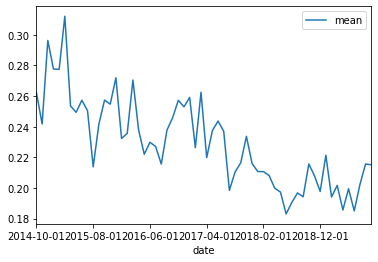

In [21]:
output['actual_costPP'].groupby(output['date']).describe().plot(y='mean', legend='true')

In [22]:
plot_data = output['actual_costPP'].groupby(output['date']).describe()

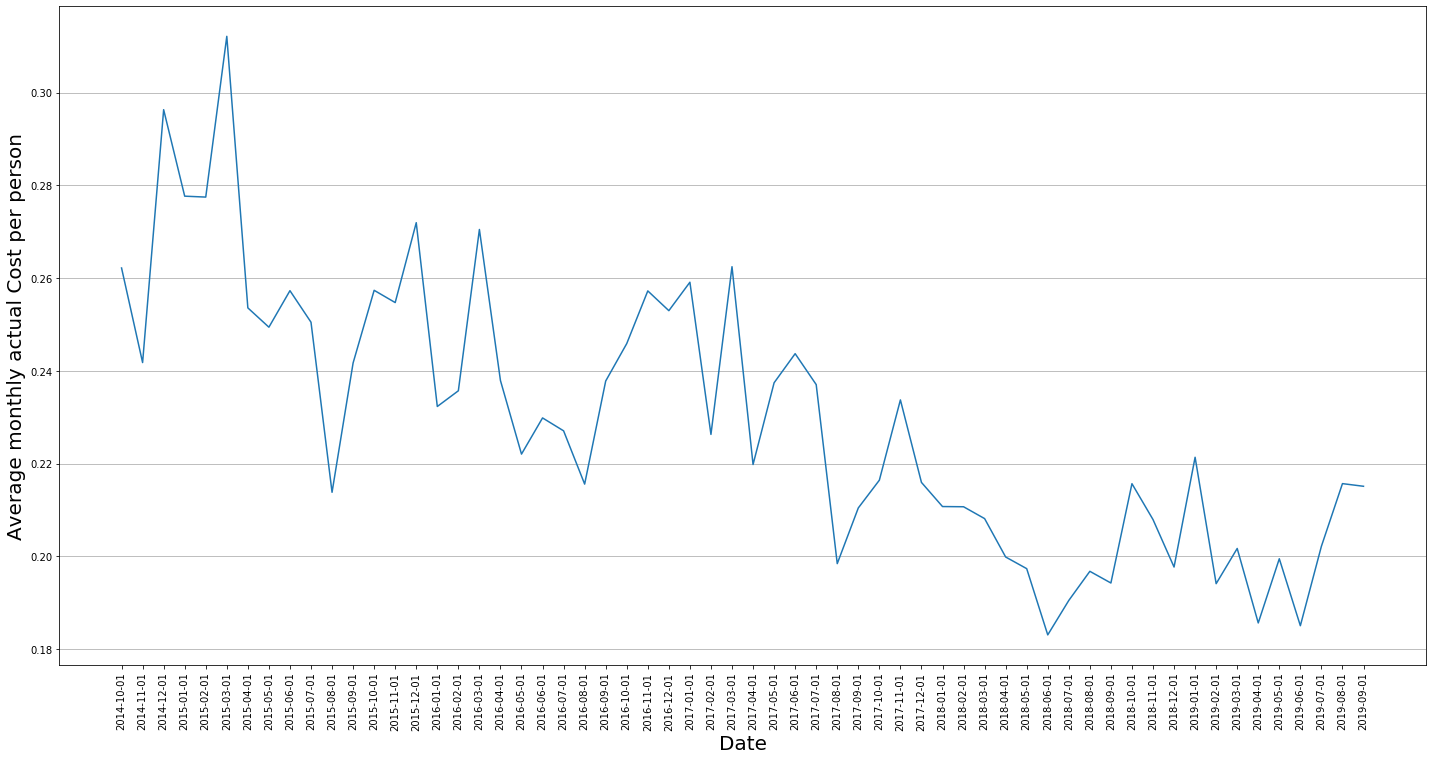

In [23]:
dates = plot_data.index
x_pos = np.arange(len(dates))
means = plot_data['mean']

import datetime
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x_pos, means)
ax.set_ylabel('Average monthly actual Cost per person', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(dates)
ax.xaxis_date()
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.xticks(rotation=90)
plt.rc('lines', linewidth=8, color='g')
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


In [24]:
plot_data[0:5]

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2014-10-01,93.0,0.262189,0.123518,0.035551,0.185714,0.235035,0.318306,0.929525
2014-11-01,93.0,0.241791,0.108265,0.029923,0.166504,0.223849,0.299548,0.700298
2014-12-01,93.0,0.296326,0.129915,0.012656,0.215280,0.271423,0.366396,0.778248
2015-01-01,92.0,0.277673,0.114315,0.014636,0.207634,0.263018,0.334547,0.661271
2015-02-01,92.0,0.277476,0.125584,0.000709,0.202982,0.258635,0.330135,0.911082


In [25]:
dates = plot_data.index
x_pos = np.arange(len(dates))
means = plot_data['mean']
error = plot_data['std']

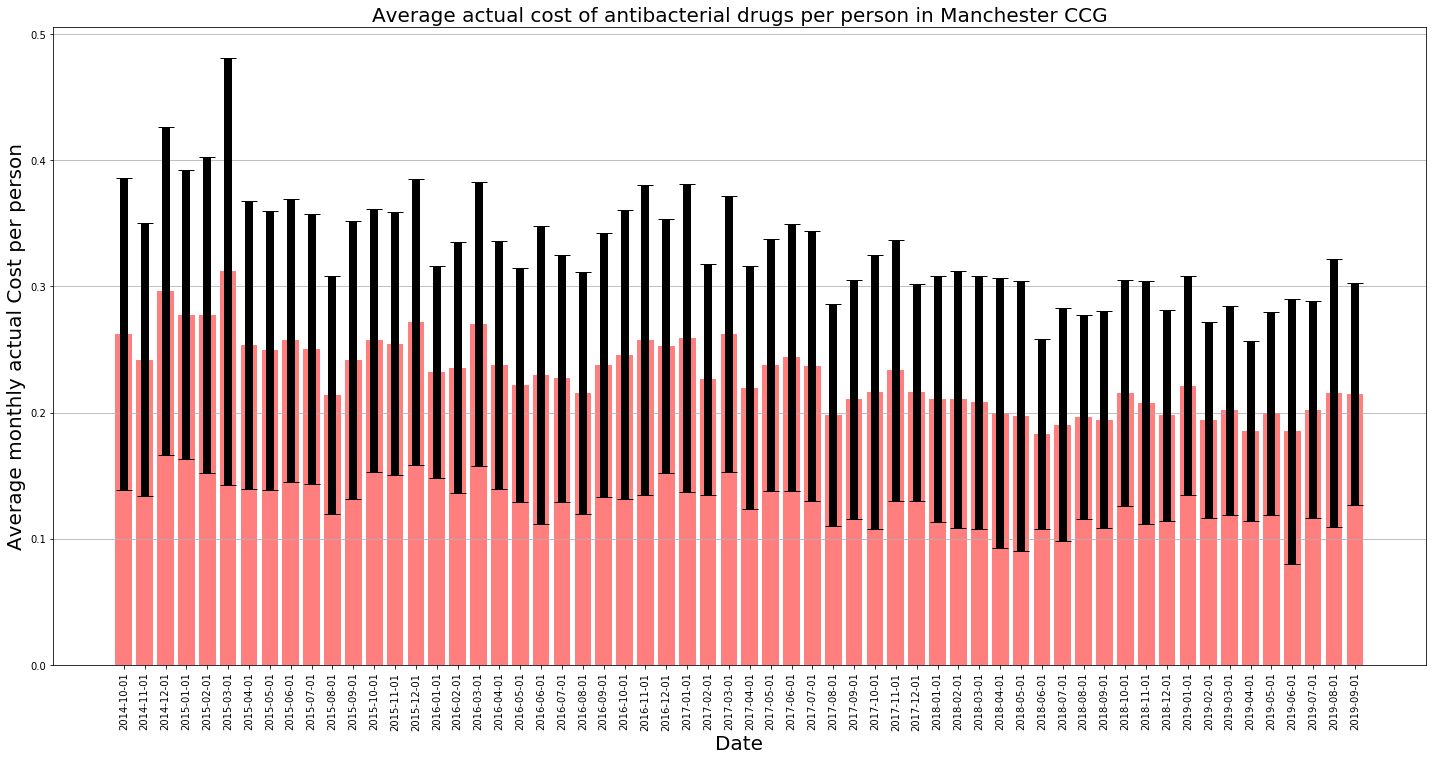

In [26]:
import datetime

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x_pos, means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=8, color='red')
ax.set_ylabel('Average monthly actual Cost per person', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(dates)
ax.xaxis_date()
ax.set_title('Average actual cost of antibacterial drugs per person in Manchester CCG', fontsize=20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [27]:
output['itemsPP'] = output['items']/output['total_list_size']
output['itemsP1000P'] = output['itemsPP']*1000

In [28]:
output[output['row_name'].str.contains("LADY")][0:5]

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting,total_list_size,actual_costPP,itemsPP,itemsP1000P
45,1913.21,14L,2014-10-01,427,17631,P84017,LADYBARN GROUP PRACTICE,4,10222,0.187166,0.041773,41.772647
138,2189.91,14L,2014-11-01,447,18790,P84017,LADYBARN GROUP PRACTICE,4,10222,0.214235,0.043729,43.729212
231,2681.89,14L,2014-12-01,630,28458,P84017,LADYBARN GROUP PRACTICE,4,10222,0.262365,0.061632,61.631775
323,2680.64,14L,2015-01-01,531,21071,P84017,LADYBARN GROUP PRACTICE,4,10268,0.261067,0.051714,51.714063
415,2496.67,14L,2015-02-01,429,18298,P84017,LADYBARN GROUP PRACTICE,4,10268,0.243151,0.041780,41.780288


In [29]:
items_data = output['itemsP1000P'].groupby(output['row_name']).describe()

In [30]:
max_items = items_data['mean'].idxmax()
min_items = items_data['mean'].idxmin()

In [31]:
mean_items_data = output['itemsP1000P'].groupby(output['date']).describe()

In [32]:
mean_items_data['mean'][0:5]

date
2014-10-01    55.304288
2014-11-01    51.970434
2014-12-01    66.809432
2015-01-01    57.501561
2015-02-01    50.596760
Name: mean, dtype: float64

In [33]:
max_centre = output[output['row_name'].str.contains(max_items)]
min_centre = output[output['row_name'].str.contains(min_items)]

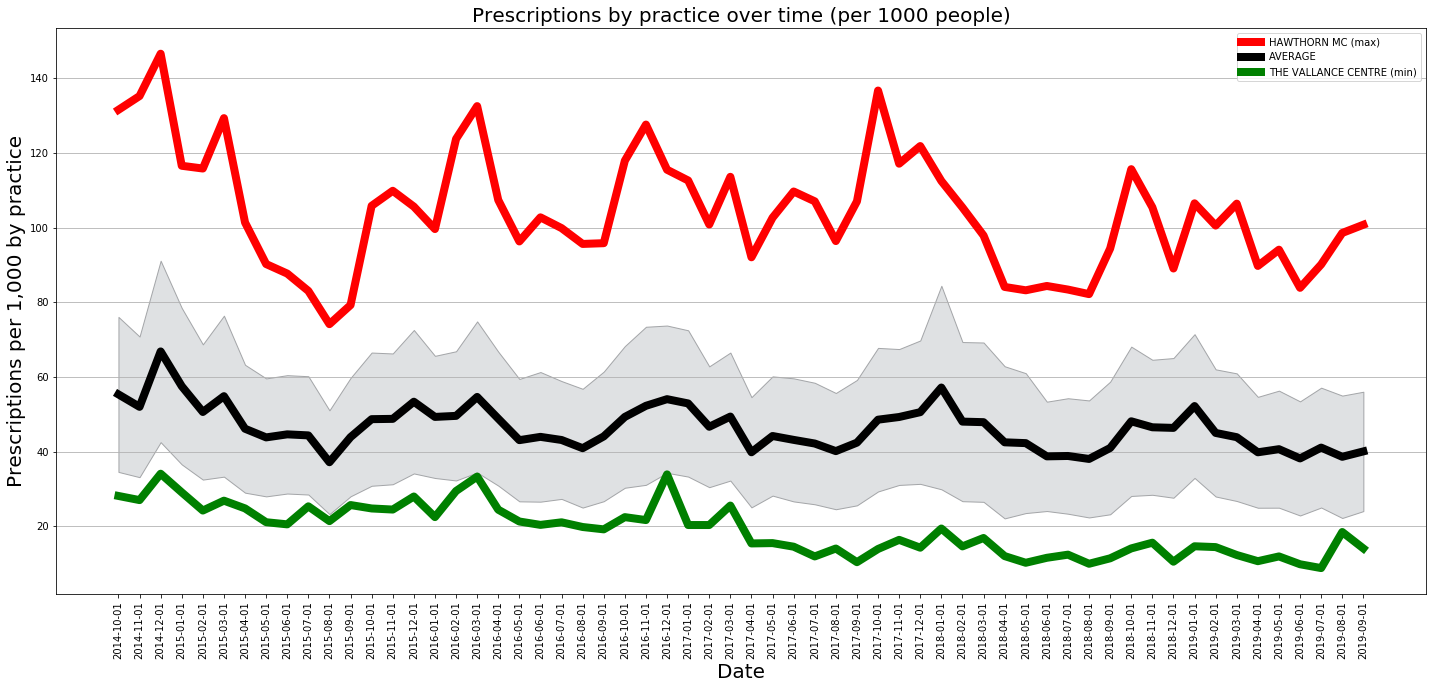

In [34]:
import datetime
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(max_centre['date'], max_centre['itemsP1000P'], color='red',label=max_items+' (max)')
ax.plot(mean_items_data.index,mean_items_data['mean'], color='black',label='AVERAGE')
ax.plot(min_centre['date'], min_centre['itemsP1000P'], color='green',label=min_items+' (min)')

ax.fill_between(mean_items_data.index, mean_items_data['mean']-mean_items_data['std'], mean_items_data['mean']+mean_items_data['std'],
                alpha=0.9, edgecolor='#9c9ea1', facecolor='#dcdee0')

ax.set_title('Prescriptions by practice over time (per 1000 people)', fontsize=20)
ax.set_ylabel('Prescriptions per 1,000 by practice', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(dates)
ax.xaxis_date()
ax.yaxis.grid(True)
leg = ax.legend()

# Save the figure and show
plt.tight_layout()
plt.xticks(rotation=90)
plt.rc('lines', linewidth=8, color='g')
plt.gcf().subplots_adjust(bottom=0.17)
plt.savefig('prescriptions_per_1000_people.png')
plt.show()

In [144]:
def make_name(CCG,BNF):
    import requests
    
    linkapi = 'https://openprescribing.net'
    
    BNF_l = '/api/1.0/bnf_code/?q='
    CCG_l = '/api/1.0/org_code/?q='
    json = '&format=json'
    
    CCG_link = linkapi + CCG_l + CCG + json
    BNF_link = linkapi + BNF_l + BNF + json
    
    CCG_request = requests.get(CCG_link)
    BNF_request = requests.get(BNF_link)
    
    CCG_data = pd.DataFrame(CCG_request.json())
    BNF_data = pd.DataFrame(BNF_request.json())
    
    return [CCG_data['code'].iloc[0], CCG_data['name'].iloc[0],BNF_data['id'].iloc[0], BNF_data['name'].iloc[0]]

In [145]:
def prescriptionsPlot(CCG, BNF, centre=''):
    
    codes_names = make_name(CCG,BNF)
    
    # Run combined_data function to retrieve both x and y information pertaining to specified CCG and BNF codes.
    combined_data = getcombined(codes_names[0],codes_names[2])
    
    # Create column for prescrition items normalised by total list size.
    combined_data['itemsPP'] = combined_data['items']/combined_data['total_list_size']
    # Multiply normalised values to create data per 1000 people.
    combined_data['itemsP1000P'] = combined_data['itemsPP']*1000
    
    # Group data by centre name and compute average and std of items 
    items_data = combined_data['itemsP1000P'].groupby(combined_data['row_name']).describe()
    
    max_items = items_data['mean'].idxmax()
    min_items = items_data['mean'].idxmin()
    
    mean_items_data = combined_data['itemsP1000P'].groupby(combined_data['date']).describe()
    
    max_centre = combined_data[combined_data['row_name'].str.contains(max_items)]
    min_centre = combined_data[combined_data['row_name'].str.contains(min_items)]
    
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(max_centre['date'], max_centre['itemsP1000P'], color='red',label=max_items+' (max)')
    ax.plot(mean_items_data.index,mean_items_data['mean'], color='black',label='AVERAGE')
    ax.plot(min_centre['date'], min_centre['itemsP1000P'], color='green',label=min_items+' (min)')

    if centre:
        custom_centre = combined_data[combined_data['row_name'].str.contains(centre)]
        name = custom_centre['row_name'].iloc[0]
        ax.plot(custom_centre['date'], custom_centre['itemsP1000P'], color='#6bdcff',label=name)
    
    ax.fill_between(mean_items_data.index, mean_items_data['mean']-mean_items_data['std'], mean_items_data['mean']+mean_items_data['std'],
                    alpha=0.9, edgecolor='#9c9ea1', facecolor='#dcdee0')
    
    title = 'Prescriptions for ' + codes_names[3] + ' in ' + codes_names[1] + ' over time (per 1000 people)'

    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Prescriptions per 1,000 by practice', fontsize=20)
    ax.set_xlabel('Date', fontsize=20)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(dates)
    ax.xaxis_date()
    ax.yaxis.grid(True)
    leg = ax.legend()

    # Save the figure and show
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.rc('lines', linewidth=8, color='g')
    plt.gcf().subplots_adjust(bottom=0.17)
    plt.savefig('prescriptions_per_1000_people.png')
    plt.show()

    

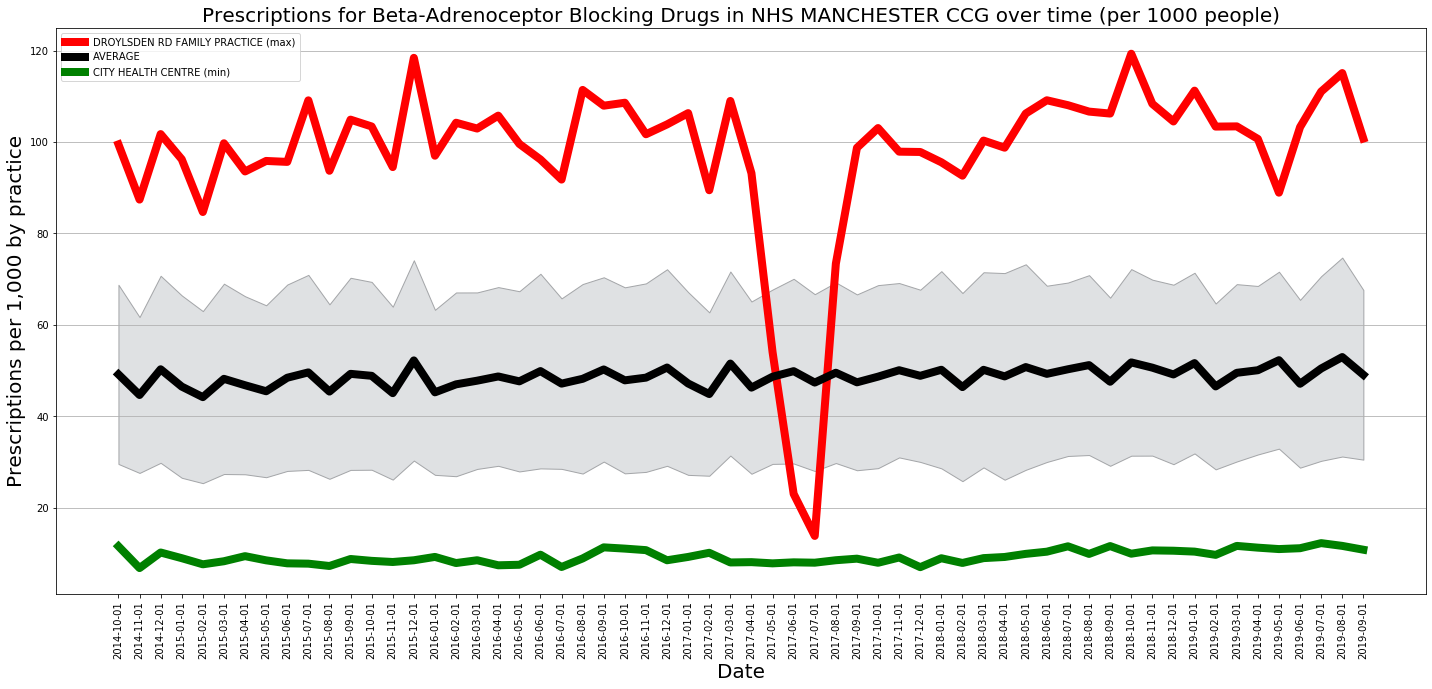

In [151]:
combined = prescriptionsPlot(CCG='14L', BNF='beta')